In [785]:
import pandas as pd


In [786]:
df=pd.read_csv('train_loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [787]:
df.shape

(614, 13)

In [788]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [789]:
def impute_nan(var):
    most_freq_category=list(df[var].mode())[-1]
    df[var].fillna(most_freq_category,inplace=True)
    

In [790]:
for feature in ['Gender','Self_Employed','Dependents','Married','Credit_History','Loan_Amount_Term']:
    impute_nan(feature)

In [791]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

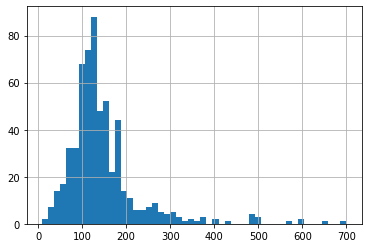

In [792]:
df['LoanAmount'].hist(bins=50)

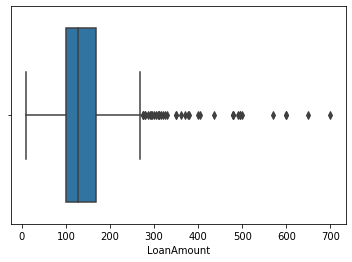

In [793]:
import seaborn as sns
sns.boxplot(df['LoanAmount'],data=df)

In [794]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [795]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [796]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [797]:
Gender_encoded=pd.get_dummies(df['Gender'],drop_first=True)

In [798]:
df=pd.concat([df,Gender_encoded],axis=1)
df.drop('Gender',axis=1,inplace=True)
#feature='Gender'
#v_dict=df[feature].value_counts().to_dict()
#df[feature]=df[feature].map(v_dict)


In [799]:
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male
0,LP001002,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [800]:
df['Credit_History'].unique()

array([1., 0.])

In [801]:
for feature in ['Education','Self_Employed','Married','Property_Area']:
    feature_encoded=pd.get_dummies(df[feature],drop_first=True)
    df=pd.concat([df,feature_encoded],axis=1)
    df.drop(feature,axis=1,inplace=True)
    #v_dict=df[feature].value_counts().to_dict()
    #df[feature]=df[feature].map(v_dict)


In [802]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Yes,Yes,Semiurban,Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,Y,1,0,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,1,0,0,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,1,0,1,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,1


In [803]:
import numpy as np
dep_dict=df['Dependents'].value_counts().to_dict()
dep_dict
df['Dependents']=df['Dependents'].map(dep_dict)

In [804]:
df.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Not Graduate,Yes,Yes,Semiurban,Urban
0,LP001002,360,5849,0.0,128.0,360.0,1.0,Y,1,0,0,0,0,1
1,LP001003,102,4583,1508.0,128.0,360.0,1.0,N,1,0,0,1,0,0
2,LP001005,360,3000,0.0,66.0,360.0,1.0,Y,1,0,1,1,0,1
3,LP001006,360,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1,0,1
4,LP001008,360,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,1


In [805]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df.drop(['Loan_Status','Loan_ID'],axis=1)),columns=final_df.columns)
df_minmax.head()###

,Gender,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Not Graduate,Yes,Yes,Semiurban,Urban,Y
0,1.000000,0.070489,0.000000,0.172214,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.165049,0.054830,0.036192,0.172214,0.74359,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.000000,0.035250,0.000000,0.082489,0.74359,1.0,1.0,0.0,1.0,1.0,0.0,1.0
3,1.000000,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,1.000000,0.072356,0.000000,0.191027,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [806]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_minmax,df['Loan_Status'],test_size=0.25,random_state=0)

In [807]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression()

In [812]:
y_pred=regressor.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.8311688311688312

In [813]:
confusion_matrix(y_test,y_pred)

array([[ 19,  24],
       [  2, 109]], dtype=int64)